   #                               **Machine Learning Pipeline**

'![Here is a picture of houses in Melbourne](pipeline.jpeg)'

#### This is the format I am following to make my machine-learning pipeline. I have tried my best to include almost everything in different steps as assisted above. 

   ###                                             Melbourne Housing Price Prediction

#### I chose a Melbourne Housing Dataset. It's linked with real-estate and housing prices for the houses located in different locations in Melbourne Australia. As housing market is one of the most talked about and trending business I want to train my machine learning model to predict the prices of the houses in the future in Melbourne based on different criterias.

'![Here is a picture of houses in Melbourne](Unknown.jpeg)'

### Importing Libraries

In [192]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [248]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn import tree
import sklearn.model_selection
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

### Data Collection

In [194]:
df = pd.read_csv('melb_data.csv') #to view all the columns.
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [195]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Data Exploration

In [196]:
#pricecolumn = 'Price'
#X = df.drop(pricecolumn, axis = 1)
#y = df[pricecolumn]

In [197]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

In [198]:
df_train, df_test = train_test_split(df)
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)
df_test = pd.DataFrame(df_test, columns=['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2',  'Bathroom','Car','Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea','Lattitude', 'Longtitude','Regionname', 'Propertycount'])


df_train: (10185, 21)
df_test: (3395, 21)


#### I used different visualization methods like histograms, box plots, scatter plot to explore my dataset more. Along with it I also looked at the columns in my dataset so that I can remove the unneccessary ones and found out more information about the data using .info

In [199]:
df_train.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1889,Clifton Hill,17 Myrtle St,2,h,1435000.0,S,Nelson,10/09/2016,3.4,3068.0,...,1.0,2.0,239.0,96.0,1900.0,Yarra,-37.79180,144.99700,Northern Metropolitan,2954.0
6482,West Melbourne,5/467 King St,2,u,620000.0,S,Jellis,28/05/2016,1.9,3003.0,...,1.0,1.0,0.0,83.0,2002.0,Melbourne,-37.80910,144.95200,Northern Metropolitan,2230.0
11928,Camberwell,1/43 Inglesby Rd,2,u,682000.0,S,Jellis,29/07/2017,7.7,3124.0,...,1.0,1.0,1106.0,NaN,1970.0,Boroondara,-37.83473,145.05698,Southern Metropolitan,8920.0
12480,Doncaster,4 Tudor Rd,5,h,1540500.0,S,Jellis,9/09/2017,12.4,3108.0,...,2.0,2.0,726.0,NaN,NaN,NaN,-37.78133,145.10833,Eastern Metropolitan,9028.0
9086,Carrum,14 Parkside Bvd,2,u,529000.0,S,Buxton,3/06/2017,31.2,3197.0,...,1.0,1.0,199.0,84.0,1970.0,Kingston,-38.07938,145.13227,South-Eastern Metropolitan,1989.0


In [200]:
df_train.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [201]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10185 entries, 1889 to 8410
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10185 non-null  object 
 1   Address        10185 non-null  object 
 2   Rooms          10185 non-null  int64  
 3   Type           10185 non-null  object 
 4   Price          10185 non-null  float64
 5   Method         10185 non-null  object 
 6   SellerG        10185 non-null  object 
 7   Date           10185 non-null  object 
 8   Distance       10185 non-null  float64
 9   Postcode       10185 non-null  float64
 10  Bedroom2       10185 non-null  float64
 11  Bathroom       10185 non-null  float64
 12  Car            10132 non-null  float64
 13  Landsize       10185 non-null  float64
 14  BuildingArea   5329 non-null   float64
 15  YearBuilt      6139 non-null   float64
 16  CouncilArea    9180 non-null   object 
 17  Lattitude      10185 non-null  float64
 18  Long

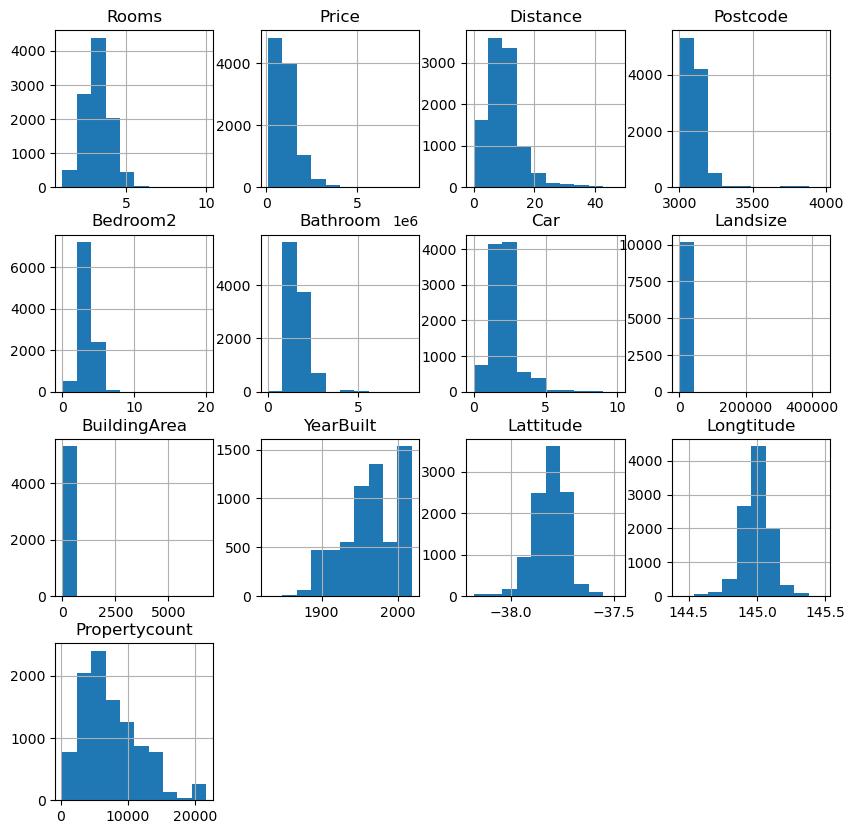

In [202]:
#histogram
df_train.hist(figsize=(10, 10))
plt.show()

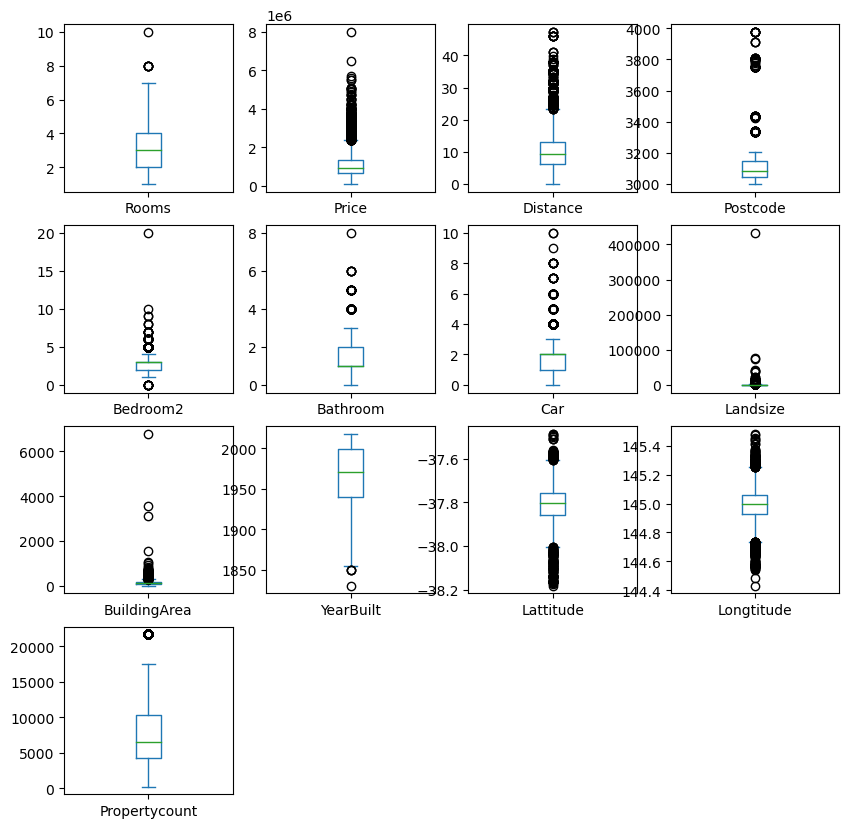

In [203]:
#boxplot
df_train.plot(kind='box', subplots=True, layout=(4, 4), figsize=(10, 10))
plt.show()

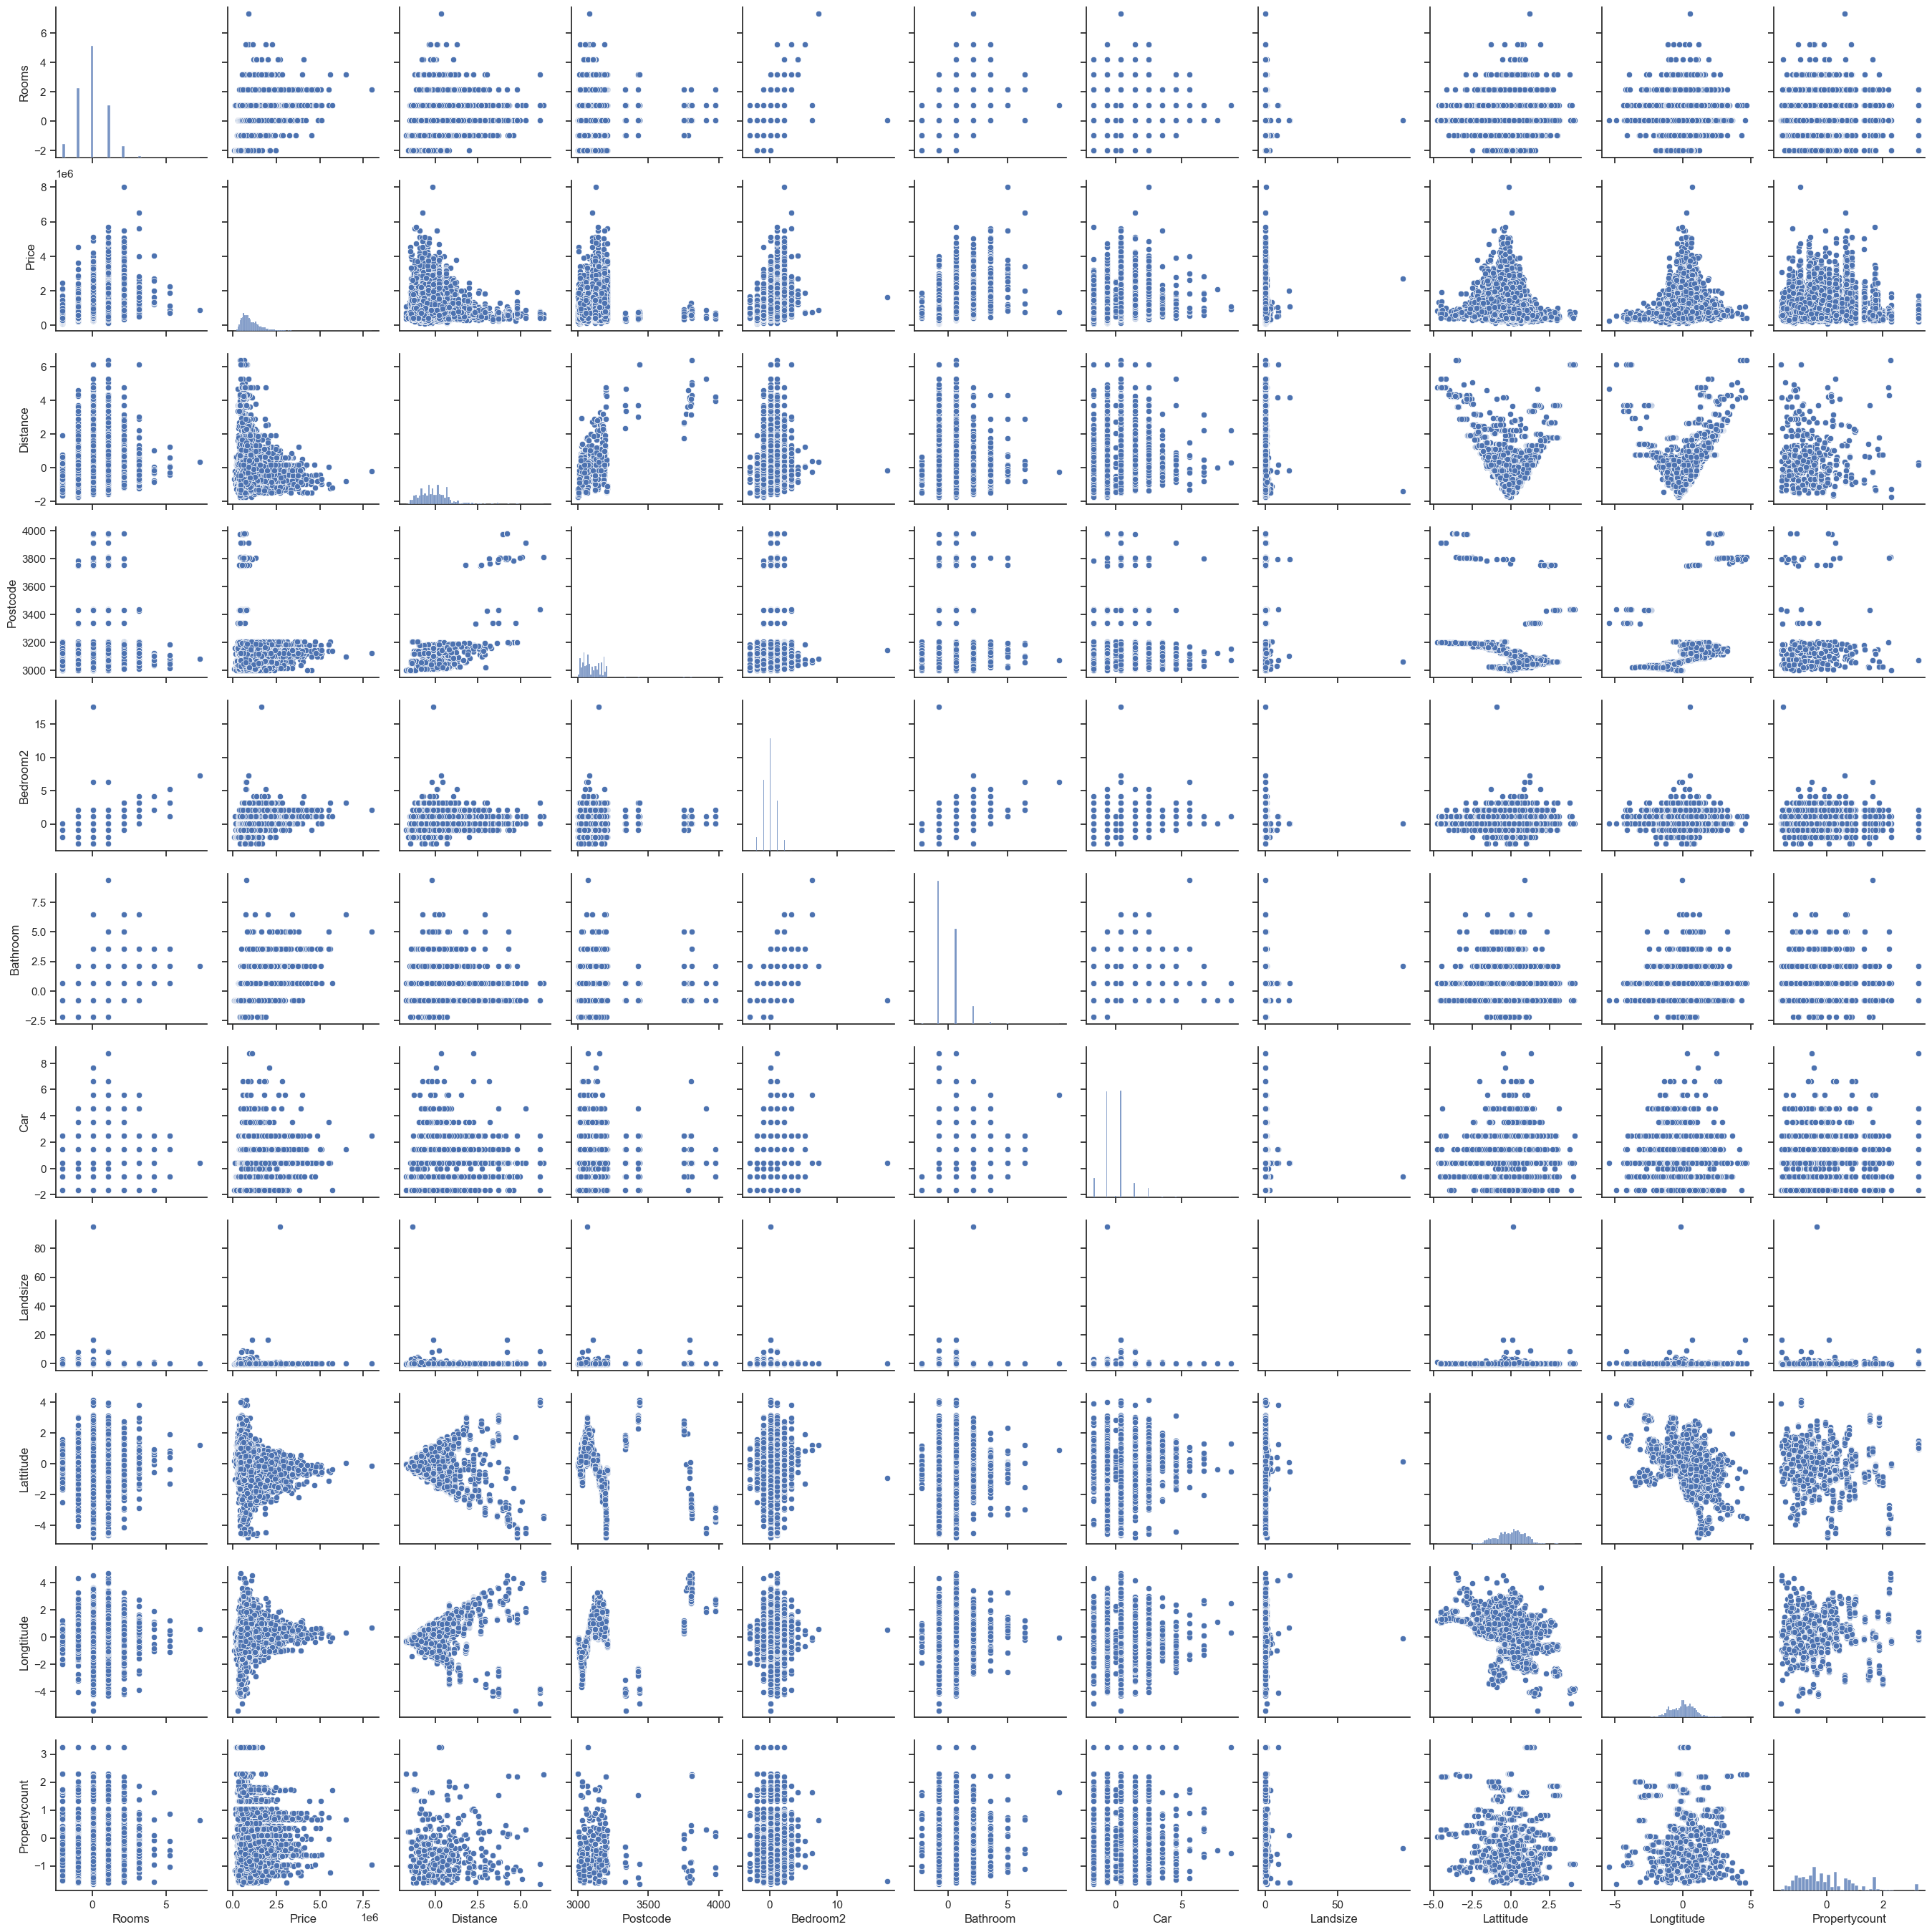

In [314]:
sns.pairplot(df_train)
plt.show()
#scatter plot

#### I saw some inconsistencies in my dataset so now I am identifying data quantity issues.

In [205]:
df_train.shape

(10185, 21)

In [206]:
print(df_train.isnull().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                53
Landsize            0
BuildingArea     4856
YearBuilt        4046
CouncilArea      1005
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


In [1]:
'print(df_train.duplicated().sum())'

'print(df_train.duplicated().sum())'

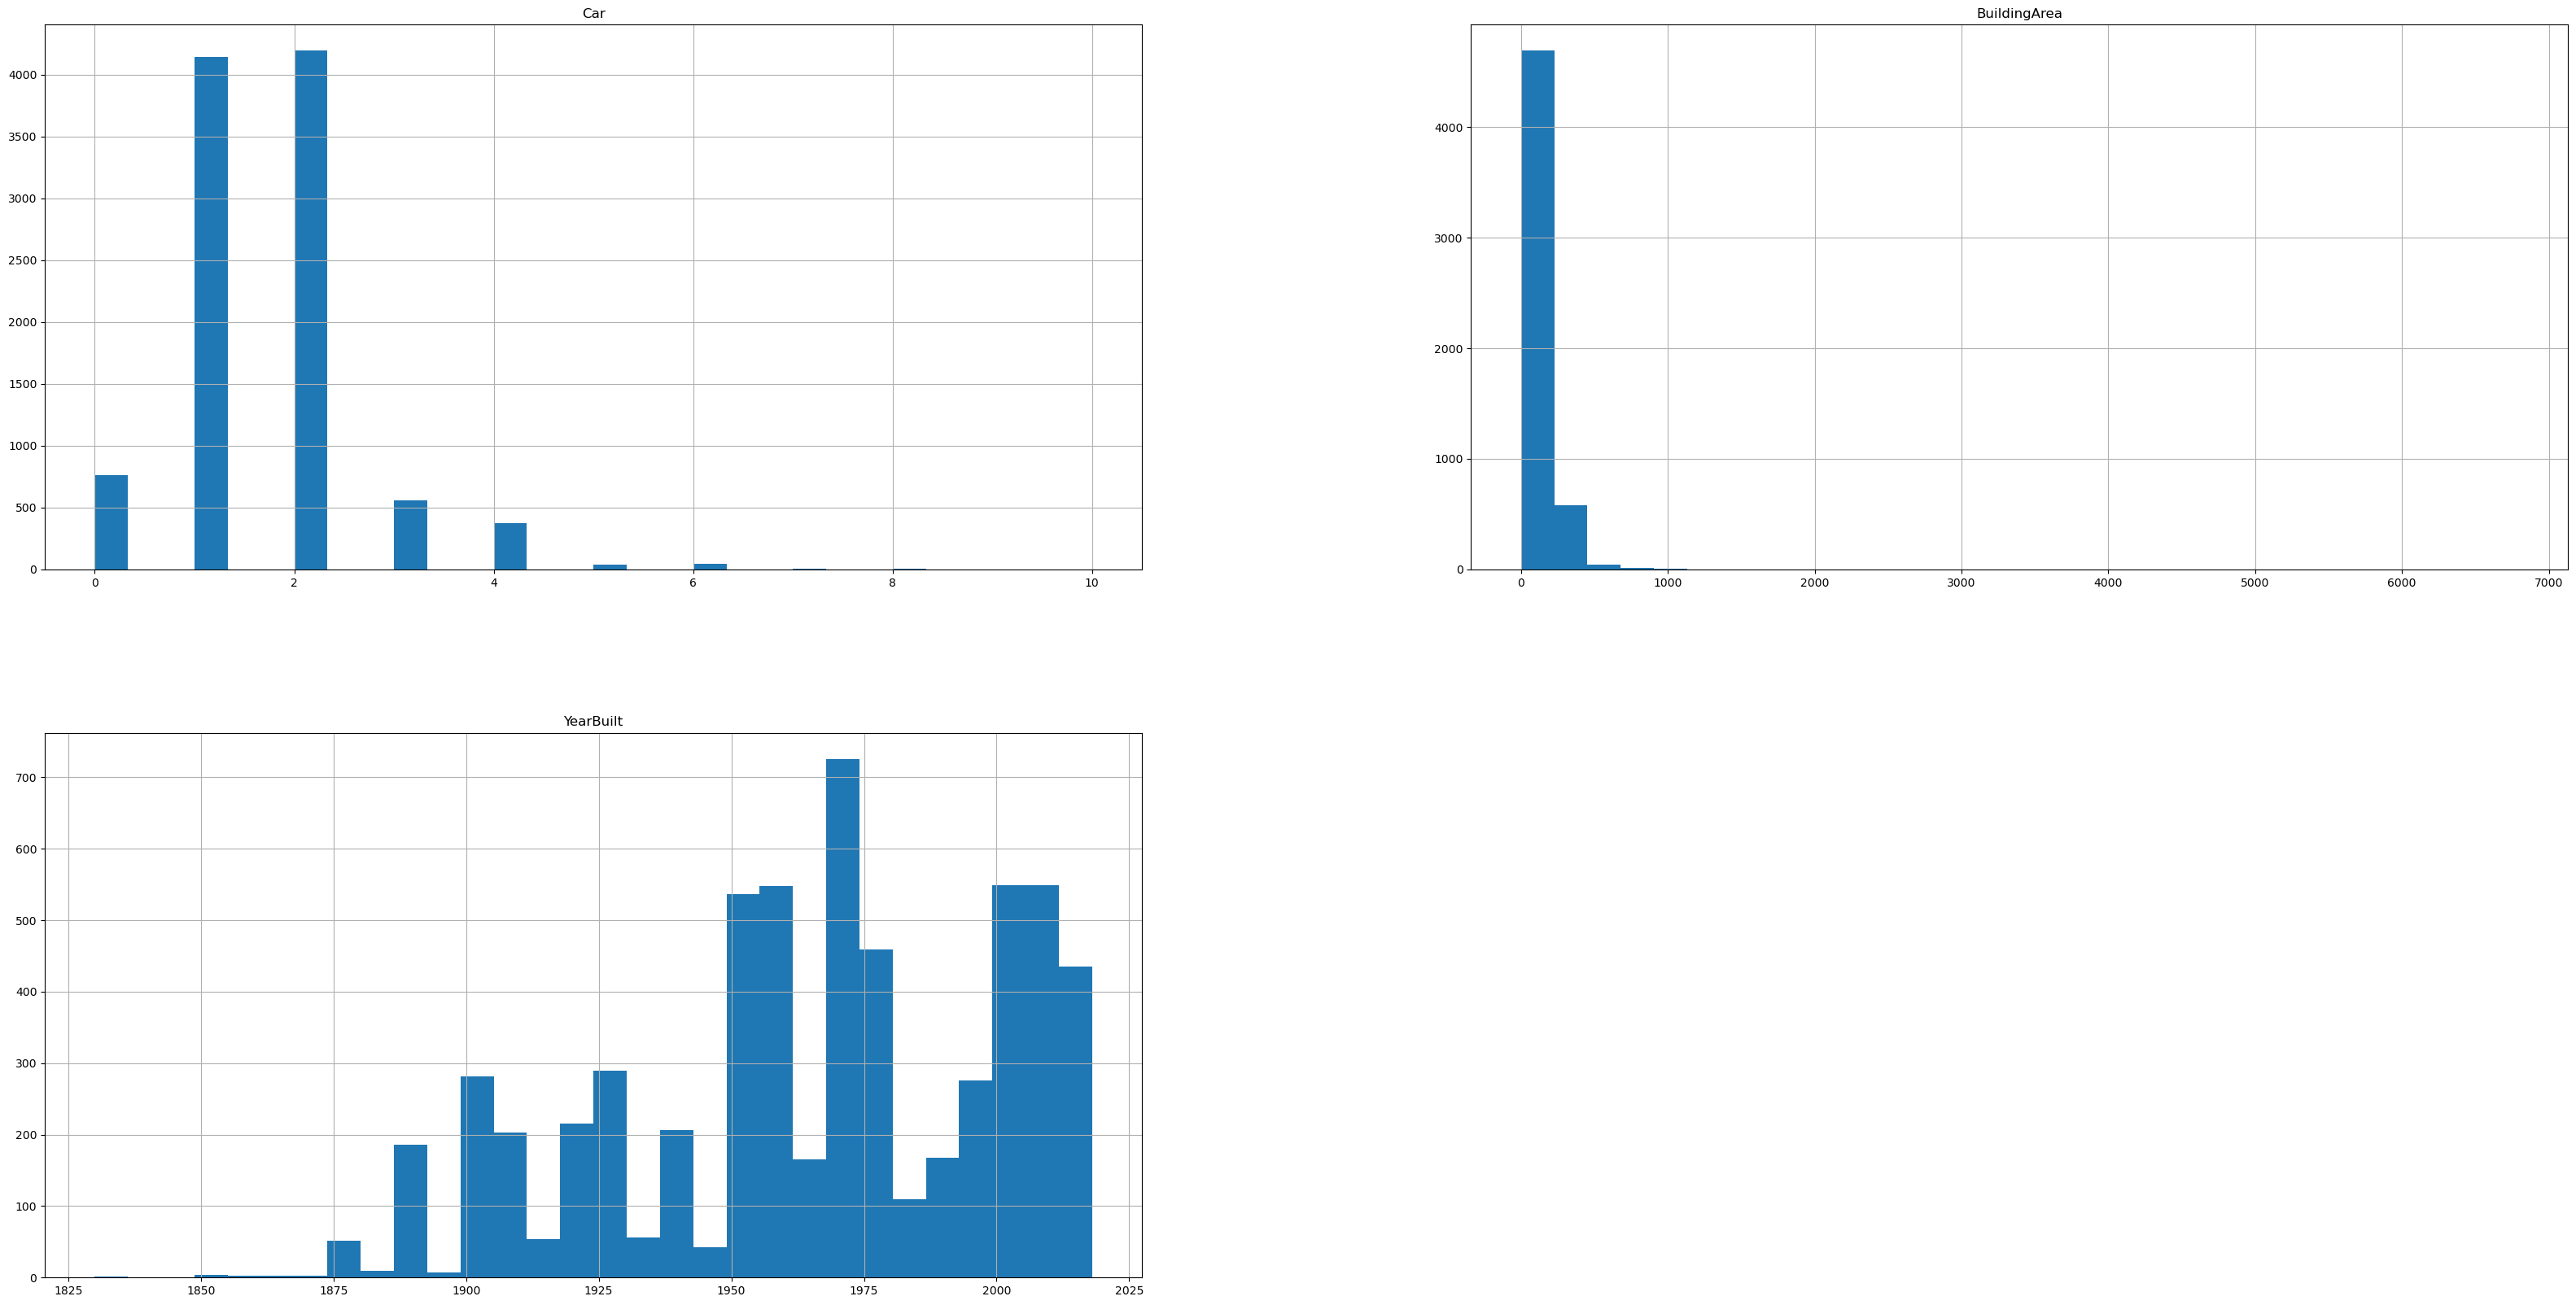

In [208]:
columns = ['Car', 'BuildingArea', 'YearBuilt']
df_train[columns].hist(bins=30, figsize=(40, 20))
plt.show()

#### Council Area is a string and to create a histogram for it we can simply counting frequencies of each string. I used value_counts function to count the frequency of each string. And later plotting a graph with the values

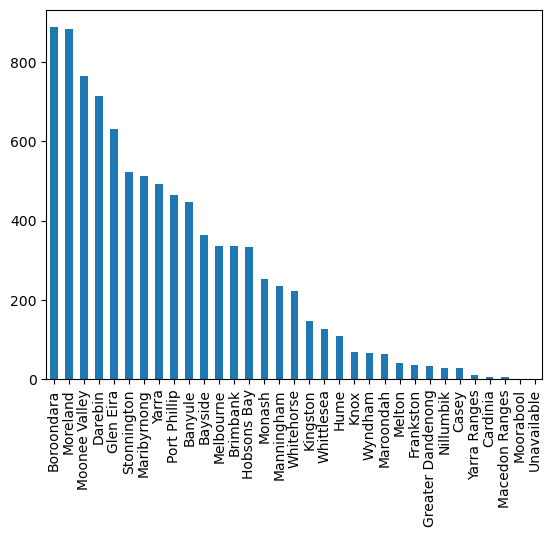

In [209]:
counts = df_train['CouncilArea'].value_counts()
counts.plot(kind='bar')
plt.show()

#### I found out that my data has alot of missing values in it so I have to clean and handle the missing values in data preprocessing phase.

#### The corr() method is used to analyse the correlation coefficients between pairs of features. This step is important as it helps to determine which variables we want to investigate further. 

In [210]:
corr_matrix = df_train.corr()

In [211]:
corr_matrix 

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.505062,0.289029,0.051521,0.940580,0.593346,0.402923,0.020179,0.391831,-0.065193,0.019811,0.102077,-0.082772
Price,0.505062,1.000000,-0.164626,0.110801,0.482890,0.480489,0.238869,0.039081,0.345017,-0.337127,-0.215294,0.206302,-0.043118
Distance,0.289029,-0.164626,1.000000,0.424882,0.289895,0.120913,0.254743,0.015811,0.102908,0.253841,-0.133070,0.240078,-0.060862
Postcode,0.051521,0.110801,0.424882,1.000000,0.057155,0.110063,0.052853,0.023399,0.053206,0.034344,-0.409272,0.446299,0.064090
Bedroom2,0.940580,0.482890,0.289895,0.057155,1.000000,0.583771,0.398701,0.020342,0.384625,-0.053655,0.020899,0.104227,-0.081529
Bathroom,0.593346,0.480489,0.120913,0.110063,0.583771,1.000000,0.318808,0.035057,0.353314,0.149343,-0.076190,0.116571,-0.053494
Car,0.402923,0.238869,0.254743,0.052853,0.398701,0.318808,1.000000,0.020076,0.216265,0.113258,0.001981,0.064969,-0.021115
Landsize,0.020179,0.039081,0.015811,0.023399,0.020342,0.035057,0.020076,1.000000,0.076643,0.042865,0.004492,0.015451,-0.004670
BuildingArea,0.391831,0.345017,0.102908,0.053206,0.384625,0.353314,0.216265,0.076643,1.000000,0.014624,-0.029266,0.083177,-0.039293
YearBuilt,-0.065193,-0.337127,0.253841,0.034344,-0.053655,0.149343,0.113258,0.042865,0.014624,1.000000,0.056529,-0.000794,0.011158


<AxesSubplot:>

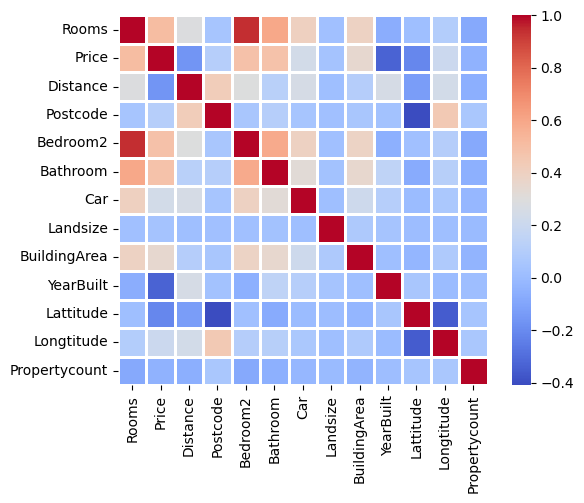

In [212]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm', linewidths=1)

####  Random sampling is the technique is the sampling technique I am using for my dataset as its easier to apply. In this method the sample size is randomly selected from the whole dataset. I have splitted the data into df_train and df_test for now. Later I will be splitting it into x_train, y_train, x_test and y_test. The encoding technique I am using is label encoding for my model to prevent it from being overfitted. Since my model is a regression model I'll be using is Linear Regression and to evaluate the dataset I'll be using mean squared error or mean_absolute_error

## Data Preprocessing

#### Dropping unnecessary columns from the dataset i.e the columns that are not so useful to predict the price. First I am loading all the columns in my dataset (df_train).

In [213]:
list(df_train.columns)

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [214]:
unnecessary_cols = ['SellerG', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Address']
df_train.drop(['SellerG', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Address'], axis=1, inplace=True)

In [215]:
list(df_train.columns)

['Suburb',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [216]:
df_test.drop(['SellerG', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Address'], axis=1, inplace=True)

#### Handling missing datas

In [272]:
df_train.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

#### I am filling up the missing spaces with the mean and dropping it because when I dropped it my results were inconsistent and it caused underfitting of data. 

In [273]:
df_train['Distance'].fillna((df_train['Distance'].mean()), inplace=True)
df_test['Distance'].fillna((df_test['Distance'].mean()), inplace=True)
df_train['Landsize'].fillna((df_train['Landsize'].mean()), inplace=True)
df_test['Landsize'].fillna((df_test['Landsize'].mean()), inplace=True)

In [219]:
df_train["Car"].fillna(df_train["Car"].mean(), inplace=True)
df_test["Car"].fillna(df_test["Car"].mean(), inplace=True)
df_train.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

#### Handling duplicate data if there is any

In [220]:
duplicates = df_train.duplicated()
duplicates = df_train.duplicated()
df_test = df_test.drop_duplicates()

In [221]:
print(df_train.shape)

(10185, 16)


#### There is a huge gap between values for some values in the dataset meaning there are some outliers. The next step is to handle those outliers. I wrote a code that first calculates the z-score for each value in the column it then finds the z-score values greater than 4 in the rows and removes them. 

In [222]:
columns = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 
           'Lattitude', 'Longtitude', 'Propertycount']

#### Since the code was still showing some warnings in this step I calculated the mean and standard deviation of the columns only first. and then I used a standard scaler and fitted it in my train and test set. I used .iloc for indexing the specific rows and columns from my dataset.

In [271]:
c_cols = df_test[columns]
z_scorevalue = np.abs((c_cols - c_cols.mean()) / c_cols.std())

In [224]:
scaler = StandardScaler()
df_train.loc[:, columns] = scaler.fit_transform(df_train.loc[:, columns])
df_test.loc[:, columns] = scaler.transform(df_test.loc[:, columns])
z_scorevalue = np.abs((df_test[columns] - df_test[columns].mean()) / df_test[columns].std())
outliers = np.where(np.abs(z_scorevalue) > 5)


In [225]:
print(df_train)

               Suburb     Rooms Type      Price Method        Date  Distance  \
1889     Clifton Hill -0.977973    h  1435000.0      S  10/09/2016 -1.156771   
6482   West Melbourne -0.977973    u   620000.0      S  28/05/2016 -1.414449   
11928      Camberwell -0.977973    u   682000.0      S  29/07/2017 -0.418094   
12480       Doncaster  2.138303    h  1540500.0      S   9/09/2017  0.389298   
9086           Carrum -0.977973    u   529000.0      S   3/06/2017  3.618862   
...               ...       ...  ...        ...    ...         ...       ...   
7519   Bentleigh East  1.099544    h  1860000.0     PI  13/05/2017  0.646976   
9072     Burwood East  1.099544    h  1032000.0      S   3/06/2017  0.784404   
13144      Cheltenham  0.060785    t   795000.0      S  23/09/2017  1.334117   
7016    Hawthorn East -2.016732    u   430000.0      S  25/02/2017 -0.452451   
8410         Sunshine  0.060785    h   950000.0      S   6/05/2017  0.423655   

       Postcode  Bedroom2  Bathroom    

#### There are still some issues with my data that's why I am using imputer.

In [226]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df_train)
df_train_imputed = pd.DataFrame(imputer.transform(df_train), columns= df_train.columns)
df_test_imputed = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)

## Feature Engineering

### Splitting the data into train and test

#### I tried putting test size 0.5 and random state None but it caused imbalancement in the number of columns while splitting it into train and test sets. So, I am putting my random state to 42. 

In [227]:
X_train = df_train.drop('Price',axis=1)
y_train = df_train['Price']
X_test = df_test.drop('Price',axis=1)
y_test = df_test['Price']
print(X_train)
print(y_train)

               Suburb     Rooms Type Method        Date  Distance  Postcode  \
1889     Clifton Hill -0.977973    h      S  10/09/2016 -1.156771    3068.0   
6482   West Melbourne -0.977973    u      S  28/05/2016 -1.414449    3003.0   
11928      Camberwell -0.977973    u      S  29/07/2017 -0.418094    3124.0   
12480       Doncaster  2.138303    h      S   9/09/2017  0.389298    3108.0   
9086           Carrum -0.977973    u      S   3/06/2017  3.618862    3197.0   
...               ...       ...  ...    ...         ...       ...       ...   
7519   Bentleigh East  1.099544    h     PI  13/05/2017  0.646976    3165.0   
9072     Burwood East  1.099544    h      S   3/06/2017  0.784404    3151.0   
13144      Cheltenham  0.060785    t      S  23/09/2017  1.334117    3192.0   
7016    Hawthorn East -2.016732    u      S  25/02/2017 -0.452451    3123.0   
8410         Sunshine  0.060785    h      S   6/05/2017  0.423655    3020.0   

       Bedroom2  Bathroom       Car  Landsize  Latt

In [228]:
X_train.columns

Index(['Suburb', 'Rooms', 'Type', 'Method', 'Date', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

### Feature Tranformation

#### Using Label Encoding to change all categorical data into numerical data and to avoid over fitting my data at the end for both train and test sets to avoid errors later and aslo to make the dataset more simpler to work with.

In [230]:
X_train = pd.DataFrame(X_train, columns=X_train.columns[:-1])
le = preprocessing.LabelEncoder()
X_train['Suburb'] = le.fit_transform(X_train['Suburb'])
X_train['Type'] = le.fit_transform(X_train['Type'])
X_train['Method'] = le.fit_transform(X_train['Method'])
X_train['Regionname'] = le.fit_transform(X_train['Regionname'])
X_train['Date']  = le.fit_transform(X_train['Date'])
X_train.head()

,Suburb,Rooms,Type,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname
1889,78,-0.977973,0,1,1,-1.156771,3068.0,-0.944009,-0.777210,0.405753,-0.073886,0.215178,0.016354,2
6482,289,-0.977973,2,1,38,-1.414449,3003.0,-0.944009,-0.777210,-0.634240,-0.126356,-0.005222,-0.415833,2
11928,57,-0.977973,2,1,41,-0.418094,3124.0,-0.944009,-0.777210,-0.634240,0.116455,-0.331746,0.592410,5
12480,100,2.138303,0,1,57,0.389298,3108.0,2.139942,0.671524,0.405753,0.033030,0.348565,1.085583,0
9086,64,-0.977973,2,1,42,3.618862,3197.0,-0.944009,-0.777210,-0.634240,-0.082667,-3.448563,1.315506,4


In [231]:
X_test = pd.DataFrame(X_test, columns=X_test.columns[:-1])

le = preprocessing.LabelEncoder()
X_test['Suburb'] = le.fit_transform(X_test['Suburb'])
X_test['Type'] = le.fit_transform(X_test['Type'])
X_test['Method'] = le.fit_transform(X_test['Method'])
X_test['Regionname'] = le.fit_transform(X_test['Regionname'])
X_test['Date']  = le.fit_transform(X_test['Date'])

### Feature Extraction and Selection

#### I used sci-kit learn and used SelectKBest to remove all but the k high scoring features. This was something I wanted to try as I was looking through various methods. I learned that SelectKBest has different features for classification and regression models. As I am working with a regression model I used r_regression there are also other methods like f_regression and mutual_info_regression. 

In [232]:
selector = SelectKBest(f_classif, k=5)
selector.fit(X_train, y_train)
X_train_top5 = selector.transform(X_train)
X_test_top5 = selector.transform(X_test)

#### Also applied OneHotEncoder to X_train cause the data has had some issues in the past when I tried running it. So to avoid it later I am using it.  

In [233]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
suburb_encoded = encoder.fit_transform(X_train[['Suburb']])
X_train_encoded = pd.concat([X_train.drop('Suburb', axis=1), pd.DataFrame(suburb_encoded)], axis=1)

### Feature Scaling

#### I am using Standard Scalar to scale my dataset so that the dataset can have similar ranges.

In [234]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train

array([[-0.83832338, -0.97797323, -0.62975621, ...,  0.21517818,
         0.0163536 , -0.86660771],
       [ 1.57992947, -0.97797323,  1.77206629, ..., -0.00522213,
        -0.41583298, -0.86660771],
       [-1.07900257, -0.97797323,  1.77206629, ..., -0.33174583,
         0.5924103 ,  0.61102614],
       ...,
       [-0.89562795,  0.06078549,  0.57115504, ..., -1.88384815,
         0.71034922,  0.61102614],
       [-0.07044214, -2.01673194,  1.77206629, ..., -0.32626768,
         0.57051285,  0.61102614],
       [ 1.25902388,  0.06078549, -0.62975621, ...,  0.21517818,
        -1.47324949,  1.10357076]])

#### In this step, I got a lot of errors in this process regarding underfitting although I don't have it anymore. I am keeping it for reference for how I went to the last part.

In [235]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_undersampled, y_train_undersampled = undersample.fit_resample(X_train, y_train)
X_test_undersampled, y_test_undersampled = undersample.fit_resample(X_test, y_test)

## Dimensionality Reduction

#### This step is crucial as it helps to reduce the unnecessary features in a dataset while it holds on to the most important ones. It reduces overfitting and makes it clearer to visualize data for future purposes.

In [236]:
pca = sklearn.decomposition.PCA(n_components=10)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (10185, 10)
X_test (3395, 10)


## Model Training

### KNN

#### I tried using K Nearest Neighbor as my machine learning algorithm. KNN algorithm is easier to use and can work with both regression and classification models. Since my dataset is not so nice SVM and Decision Tree didn't work out for me. So, I went with KNN. 

'![Here is a picture of houses in Melbourne](dirt.jpeg)'

#### But I received a warning message stating that class y has only 1 member so to modify it a little bit I am using GridSearch with some hyperparameters to and simplefilter to avoid those. I also included an image above this text to make it clear on why I used simplefilter.

In [237]:
simplefilter(action= 'ignore', category = FutureWarning)
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [5], 'weights': ['uniform']}
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5], 'weights': ['uniform']})

In [238]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

#### KNN metrics was easier to understand and use.

In [269]:
prediction = knn.predict(X_test)
prediction

array([ 762500., 1380000., 1750000., ..., 1350000.,  400000.,  615000.])

#### Precision recall is useful to calculate the true positives, false positives, true negatives and false negatives. When true positive + false positive == 0, precision is undefined. When true positive + false negative == 0, recall is undefined

In [270]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, prediction, zero_division=1)

(array([0., 0., 1., ..., 1., 0., 1.]),
 array([1., 1., 0., ..., 0., 1., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0, 0, 1, ..., 1, 0, 1]))

## Model Assessment

### Linear Regression

#### I used linear regression as my final step for the pipeline which is model assessment. I used evaluation metrics like Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

In [265]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [266]:
y_pred = model.predict(X_test)

In [267]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 238902748501.561
Root Mean Squared Error: 488776.7880142847


#### Since my model is a regression task I found an r2 score at the end. It is only 0.46 due to the inconsistent values in my data.

In [268]:
r2 = r2_score(y_test, y_pred)
r2

0.46321636395705956

#### I tried preprocessing my data repeatedly, but it always showed one or the other error cause I went for a dataset with many missing values, zeros, and mixed values. 

### Visualizing y_test and y_pred

#### For the first case I looked at a scatter plot for actual price of the house and predicted price of the house. y_test is present in the x-axis and y_pred is present in the y_axis.

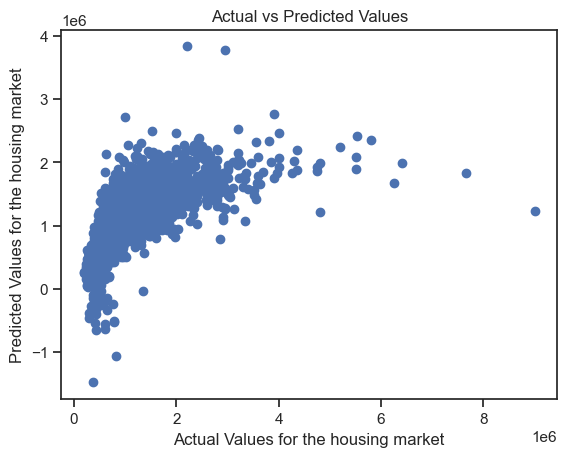

In [308]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values for the housing market")
plt.ylabel("Predicted Values for the housing market")
plt.title("Actual vs Predicted Values")
plt.show()

#### I am just testing out the code for absolute errors between the actual values of the housing market and the predicted values. I just tried doing it out of curiosity and wanted it to be a part of my pipeline. 

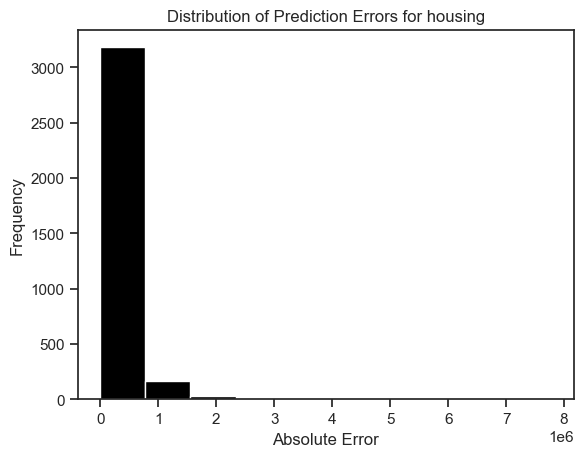

In [312]:
errors = np.abs(y_test - y_pred)
plt.hist(errors, color='black')
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors for housing")
plt.show()

## Short Analysis

##### After looking at the business model and predicting the prices of the house using linear regression what I figured out is that the data was very insufficient and old. The data was very raw and quite hard to handle. There are still alot of errors in the original dataset which are pretty confusing as well as hard to grasp. However, on the bright side I learned to work with pretty hidieous dataset. 

##### Housing market or business is one business module which will always be on trend and will be demanded until and unless there is some serious disaster or some very serious problem with the economy. The prices of houses are always rising no matter the place, real estate agents, housing owners and investors are the ones who benefit the most of this business. My model is desgined excatly for people like them who want to predict the prices of the housing market in Melbourne Australia for future analysis. 

## References

What is correlation analysis? | adobe basics (no date). Available at: https://business.adobe.com/blog/basics/correlation-analysis (Accessed: March 21, 2023). 

Ram, T. (2023) What is data quality in machine learning?, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2023/01/the-role-of-data-quality-in-machine-learning/ (Accessed: March 21, 2023). 

Tripathi, M. (2021) Top 15 pandas data exploration functions !, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/06/top-15-pandas-data-exploration-functions/ (Accessed: March 21, 2023). 

Pyplot tutorial# (no date) Pyplot tutorial - Matplotlib 3.7.1 documentation. Available at: https://matplotlib.org/stable/tutorials/introductory/pyplot.html (Accessed: March 21, 2023). 

Chat.openai.com (no date). Available at: https://chat.openai.com/ (Accessed: March 21, 2023). 


Plotting a diagonal correlation matrix# (no date) Plotting a diagonal correlation matrix - seaborn 0.12.2 documentation. Available at: https://seaborn.pydata.org/examples/many_pairwise_correlations.html (Accessed: March 21, 2023). 

Sklearn.preprocessing.LabelEncoder (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html (Accessed: March 21, 2023). 


3.3. metrics and scoring: Quantifying the quality of predictions (no date) scikit. Available at: https://scikit-learn.org/stable/modules/model_evaluation.html (Accessed: March 21, 2023). 

Real Python (2023) Python Statistics Fundamentals: How to Describe Your Data, Real Python. Real Python. Available at: https://realpython.com/python-statistics/ (Accessed: March 21, 2023). 

Continuous statistical distributions# (no date) Continuous Statistical Distributions - SciPy v1.10.1 Manual. Available at: https://docs.scipy.org/doc/scipy/tutorial/stats/continuous.html (Accessed: March 18, 2023). 


6.2. feature extraction (no date) scikit. Available at: https://scikit-learn.org/stable/modules/feature_extraction.html (Accessed: March 20, 2023). 


Dansbecker (2021) Your first machine learning model, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/dansbecker/your-first-machine-learning-model/tutorial (Accessed: March 21, 2023). 

1.13. feature selection (no date) scikit. Available at: https://scikit-learn.org/stable/modules/feature_selection.html (Accessed: March 21, 2023).

| cite this for me (no date) Cite This For Me, a Chegg service. Available at: https://www.citethisforme.com/bibliographies/a24c140d-c1ee-4cac-bd75-3fce6a08b601 (Accessed: March 21, 2023).

Sklearn.model_selection.Stratifiedkfold (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html (Accessed: March 19, 2023).

## Assessment Submission Form

'![Assessment](photo.jpeg)'

In [315]:
pip install pyppeteer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 772.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
